Purchasing power parity concept was developed in 1918. The basic idea is the law of one price -- that a good or service should cost about the same in one country as in another. PPP typically allows for some short run deviations though in the long run, the exchange rate, and the two general country prices should cointegrate - or return to euilibrium. If it does, PPP is sometimes used to "forecast" the long-term exchange rate. It it does not, then either one currency is overvalued or another undervalued. This leads to import-export imbalances that may be due to inflation and government interference. 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('POUND_USD.csv') ### need to ensure numbers are in numbers, not general or other formats in CSV
df=df.dropna()
print(df)

            Date Pound_USD
0       3/1/2000    1.6270
1       4/1/2000    1.6370
2       5/1/2000    1.6415
3       6/1/2000    1.6475
4       7/1/2000    1.6384
...          ...       ...
5990  19/12/2022    1.2180
5991  20/12/2022    1.2146
5992  21/12/2022    1.2072
5993  22/12/2022    1.2032
5994  23/12/2022    1.2054

[5995 rows x 2 columns]


In [3]:
df[["day", "month", "year"]] = df["Date"].str.split("/", expand = True) ### Splits the Date entry into 3 separate columns
print("\nNew DataFrame:") 
print(df)
### Note this split command does not work if ...parse_dates=['date']... is entered into the pd.read_csv(..)


New DataFrame:
            Date Pound_USD day month  year
0       3/1/2000    1.6270   3     1  2000
1       4/1/2000    1.6370   4     1  2000
2       5/1/2000    1.6415   5     1  2000
3       6/1/2000    1.6475   6     1  2000
4       7/1/2000    1.6384   7     1  2000
...          ...       ...  ..   ...   ...
5990  19/12/2022    1.2180  19    12  2022
5991  20/12/2022    1.2146  20    12  2022
5992  21/12/2022    1.2072  21    12  2022
5993  22/12/2022    1.2032  22    12  2022
5994  23/12/2022    1.2054  23    12  2022

[5995 rows x 5 columns]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5995 entries, 0 to 5994
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       5995 non-null   object
 1   Pound_USD  5995 non-null   object
 2   day        5995 non-null   object
 3   month      5995 non-null   object
 4   year       5995 non-null   object
dtypes: object(5)
memory usage: 234.3+ KB


In [5]:
df = df[df['Pound_USD'] != 'ND']
df.shape

(5765, 5)

In [6]:
df = df[df['Pound_USD'] != 'N']
df.shape

(5764, 5)

In [7]:
df['day'] = df['day'].astype(float)
df['month'] = df['month'].astype(float)
df['year'] = df['year'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5764 entries, 0 to 5994
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5764 non-null   object 
 1   Pound_USD  5764 non-null   object 
 2   day        5764 non-null   float64
 3   month      5764 non-null   float64
 4   year       5764 non-null   float64
dtypes: float64(3), object(2)
memory usage: 270.2+ KB


In [8]:
df['Pound_USD'] = df['Pound_USD'].astype(float)

In [9]:
print(df.iloc[-1:])

            Date  Pound_USD   day  month    year
5994  23/12/2022     1.2054  23.0   12.0  2022.0


In [10]:
print(df)

            Date  Pound_USD   day  month    year
0       3/1/2000     1.6270   3.0    1.0  2000.0
1       4/1/2000     1.6370   4.0    1.0  2000.0
2       5/1/2000     1.6415   5.0    1.0  2000.0
3       6/1/2000     1.6475   6.0    1.0  2000.0
4       7/1/2000     1.6384   7.0    1.0  2000.0
...          ...        ...   ...    ...     ...
5990  19/12/2022     1.2180  19.0   12.0  2022.0
5991  20/12/2022     1.2146  20.0   12.0  2022.0
5992  21/12/2022     1.2072  21.0   12.0  2022.0
5993  22/12/2022     1.2032  22.0   12.0  2022.0
5994  23/12/2022     1.2054  23.0   12.0  2022.0

[5764 rows x 5 columns]


In [11]:
print(df.iloc[0:1,])

       Date  Pound_USD  day  month    year
0  3/1/2000      1.627  3.0    1.0  2000.0


In [12]:
### Select only end of month exchange rates
exch = df.iloc[0:1,]

for i in range(2000,2023):
    for j in range(1,13):
        df1=df[ (df['month'] == j) & (df['year'] == i) ]
        df2=df1[-1:]
        exch = pd.concat([exch,df2],axis=0)
exch=exch.iloc[1:265,]

In [13]:
print(exch)

            Date  Pound_USD   day  month    year
20     31/1/2000     1.6182  31.0    1.0  2000.0
41     29/2/2000     1.5780  29.0    2.0  2000.0
64     31/3/2000     1.5922  31.0    3.0  2000.0
84     28/4/2000     1.5560  28.0    4.0  2000.0
107    31/5/2000     1.4968  31.0    5.0  2000.0
...          ...        ...   ...    ...     ...
5651   31/8/2021     1.3747  31.0    8.0  2021.0
5673   30/9/2021     1.3470  30.0    9.0  2021.0
5694  29/10/2021     1.3686  29.0   10.0  2021.0
5716  30/11/2021     1.3252  30.0   11.0  2021.0
5738  30/12/2021     1.3500  30.0   12.0  2021.0

[264 rows x 5 columns]


In [14]:
exch_UKUS=exch['Pound_USD']

In [15]:
dfUS = pd.read_csv('US_CPI.csv') ### need to ensure numbers are in numbers, not general or other formats in CSV
dfUS=dfUS.dropna()
print(dfUS)

    Year      Jan      Feb      Mar      Apr      May      Jun      Jul  \
0   1982   94.300   94.600   94.500   94.900   95.800   97.000   97.500   
1   1983   97.800   97.900   97.900   98.600   99.200   99.500   99.900   
2   1984  101.900  102.400  102.600  103.100  103.400  103.700  104.100   
3   1985  105.500  106.000  106.400  106.900  107.300  107.600  107.800   
4   1986  109.600  109.300  108.800  108.600  108.900  109.500  109.500   
5   1987  111.200  111.600  112.100  112.700  113.100  113.500  113.800   
6   1988  115.700  116.000  116.500  117.100  117.500  118.000  118.500   
7   1989  121.100  121.600  122.300  123.100  123.800  124.100  124.400   
8   1990  127.400  128.000  128.700  128.900  129.200  129.900  130.400   
9   1991  134.600  134.800  135.000  135.200  135.600  136.000  136.200   
10  1992  138.100  138.600  139.300  139.500  139.700  140.200  140.500   
11  1993  142.600  143.100  143.600  144.000  144.200  144.400  144.400   
12  1994  146.200  146.70

In [16]:
US_CPI_col=(dfUS.iloc[18,1:13])
print(US_CPI_col)

Jan    168.8
Feb    169.8
Mar    171.2
Apr    171.3
May    171.5
Jun    172.4
Jul    172.8
Aug    172.8
Sep    173.7
Oct    174.0
Nov    174.1
Dec    174.0
Name: 18, dtype: float64


In [17]:
for i in range(19,40):
    US_CPI_col=np.concatenate((US_CPI_col,dfUS.iloc[i,1:13]),axis=0)
print(US_CPI_col)

[168.8   169.8   171.2   171.3   171.5   172.4   172.8   172.8   173.7
 174.    174.1   174.    175.1   175.8   176.2   176.9   177.7   178.
 177.5   177.5   178.3   177.7   177.4   176.7   177.1   177.8   178.8
 179.8   179.8   179.9   180.1   180.7   181.    181.3   181.3   180.9
 181.7   183.1   184.2   183.8   183.5   183.7   183.9   184.6   185.2
 185.    184.5   184.3   185.2   186.2   187.4   188.    189.1   189.7
 189.4   189.5   189.9   190.9   191.    190.3   190.7   191.8   193.3
 194.6   194.4   194.5   195.4   196.4   198.8   199.2   197.6   196.8
 198.3   198.7   199.8   201.5   202.5   202.9   203.5   203.9   202.9
 201.8   201.5   201.8   202.416 203.499 205.352 206.686 207.949 208.352
 208.299 207.917 208.49  208.936 210.177 210.036 211.08  211.693 213.528
 214.823 216.632 218.815 219.964 219.086 218.783 216.573 212.425 210.228
 211.143 212.193 212.709 213.24  213.856 215.693 215.351 215.834 215.969
 216.177 216.33  215.949 216.687 216.741 217.631 218.009 218.178 217.9

In [18]:
US_CPI_col.shape
### 2000 - 2021, 22 x 12 months = 264

(264,)

In [19]:
dfUK = pd.read_csv('UK_CPI.csv') ### need to ensure numbers are in numbers, not general or other formats in CSV
dfUK=dfUK.dropna()
print(dfUK)

    Year      Jan      Feb      Mar      Apr      May      Jun      Jul  \
0   1988   48.395   48.551   48.717   49.280   49.529   49.730   49.720   
1   1989   50.765   50.959   51.158   51.871   52.168   52.339   52.288   
2   1990   53.637   53.954   54.217   55.211   55.735   55.929   55.836   
3   1991   57.421   57.740   57.933   59.873   60.294   60.621   60.455   
4   1992   61.423   61.707   62.020   62.694   62.911   62.939   62.625   
5   1993   62.800   63.187   63.561   64.256   64.495   64.454   64.249   
6   1994   64.477   64.777   64.981   65.550   65.759   65.757   65.354   
7   1995   66.030   66.323   66.670   67.049   67.386   67.450   67.098   
8   1996   67.775   68.095   68.378   68.734   68.946   69.013   68.575   
9   1997   69.231   69.399   69.549   69.805   70.021   70.168   69.943   
10  1998   70.254   70.498   70.700   71.072   71.449   71.343   70.952   
11  1999   71.367   71.489   71.880   72.168   72.382   72.306   71.877   
12  2000   71.936   72.15

In [20]:
UK_CPI_col=(dfUK.iloc[12,1:13])
print(UK_CPI_col)

Jan    71.936
Feb    72.159
Mar    72.338
Apr    72.573
May    72.771
Jun    72.876
Jul    72.508
Aug    72.526
Sep    73.083
Oct    73.050
Nov    73.205
Dec    73.200
Name: 12, dtype: float64


In [21]:
for i in range(13,34):
    UK_CPI_col=np.concatenate((UK_CPI_col,dfUK.iloc[i,1:13]),axis=0)
print(UK_CPI_col)

[ 71.936  72.159  72.338  72.573  72.771  72.876  72.508  72.526  73.083
  73.05   73.205  73.2    72.553  72.749  72.995  73.42   73.98   74.126
  73.559  73.852  74.054  73.933  73.788  73.975  73.736  73.824  74.116
  74.426  74.592  74.583  74.372  74.586  74.789  74.944  74.928  75.204
  74.721  74.989  75.255  75.502  75.528  75.408  75.346  75.623  75.858
  75.959  75.926  76.159  75.786  75.953  76.088  76.358  76.637  76.601
  76.405  76.602  76.678  76.878  77.031  77.433  77.015  77.208  77.542
  77.843  78.104  78.143  78.193  78.449  78.565  78.683  78.679  78.918
  78.514  78.779  78.946  79.423  79.854  80.091  80.045  80.394  80.46
  80.587  80.803  81.274  80.645  80.983  81.366  81.622  81.849  82.028
  81.529  81.818  81.875  82.274  82.494  82.967  82.407  82.997  83.369
  84.046  84.584  85.162  85.145  85.673  86.142  85.936  85.842  85.498
  84.878  85.613  85.759  85.963  86.441  86.689  86.658  87.047  87.083
  87.235  87.48   87.972  87.828  88.152  88.661  89

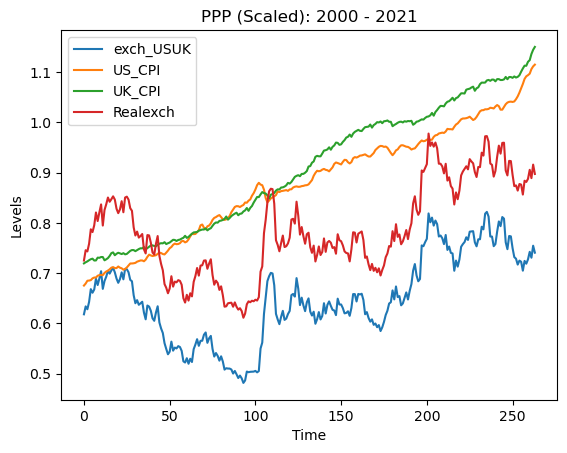

In [22]:
### Plot 1/exch_UKUS, US_CPI_col, UK_CPI_col, real exch rate: 2000 to 2021

time = range(264)  ### range(start, stop, step)

import matplotlib.pyplot as plt
# plotting the points 
exch_USUK=1/exch_UKUS
realex=exch_USUK * US_CPI_col / UK_CPI_col

plt.plot(time, exch_USUK)
plt.plot(time, US_CPI_col/250)
plt.plot(time, UK_CPI_col/100)
plt.plot(time, realex/2)

#plt.xticks([2000,"","","","",2005,"","","","",2010,"","","","",2015,"","","","",2020,""])

# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Levels')

plt.legend(['exch_USUK','US_CPI','UK_CPI','Realexch'])
  
# giving a title to my graph
plt.title('PPP (Scaled): 2000 - 2021')
  
# function to show the plot
plt.show()

In [23]:
### Transform exch rate and the CPIs to log forms
logexch=np.log(1/exch_UKUS) ### switch to pound per dollar
logUScpi=np.log(US_CPI_col)
logUKcpi=np.log(UK_CPI_col)

In [24]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['10%']
    if (pvalue < 0.10) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

# Now we perform Unit Root and Cointegration Tests for Monthly USD-Pound exch rate, US-CPI, and UK-CPI from 2000 to 2010

In [25]:
logexch1=logexch.iloc[0:132,] ### 11 years monthly data from 2000 to 2010
logUScpi1=logUScpi[0:132,]  ### Note logUScpi was constructed as numpy array - hence cannot use .iloc directly from pandas
logUKcpi1=logUScpi[0:132,]
logr1 = logexch1 + logUScpi1 - logUKcpi1

In [26]:
### Unit Root Tests of ln(USD-UKP excange rate)
print('logexch_ADF Statistic: %f' % adfuller(logexch1)[0])
print('logexch_p-value: %f' % adfuller(logexch1)[1])
check_stationarity(logexch1)

Dlogexch1 = (logexch1.diff()).dropna()
print('Dlogexch_ADF Statistic: %f' % adfuller(Dlogexch1)[0])
print('Dlogexch_p-value: %f' % adfuller(Dlogexch1)[1])
check_stationarity(Dlogexch1)

logexch_ADF Statistic: -1.987442
logexch_p-value: 0.292106
The series is NOT stationary
Dlogexch_ADF Statistic: -5.320925
Dlogexch_p-value: 0.000005
The series is stationary


In [27]:
### Unit Root Tests of ln(US_CPI)
print('logUScpi_ADF Statistic: %f' % adfuller(logUScpi1)[0])
print('logUScpi_p-value: %f' % adfuller(logUScpi1)[1])
check_stationarity(logUScpi1)

DlogUScpi1 = (np.diff(logUScpi1)) 
### Note above, we use np.diff(logUScpi), not (logUScpi.diff()) as Diff is a numpy function, not an array method, in this case.
print('DlogUScpi_ADF Statistic: %f' % adfuller(DlogUScpi1)[0])
print('DlogUScpi_p-value: %f' % adfuller(DlogUScpi1)[1])
check_stationarity(DlogUScpi1)

logUScpi_ADF Statistic: -0.806206
logUScpi_p-value: 0.817292
The series is NOT stationary
DlogUScpi_ADF Statistic: -7.409877
DlogUScpi_p-value: 0.000000
The series is stationary


In [28]:
### Unit Root Tests of ln(UK_CPI)
print('logUKcpi_ADF Statistic: %f' % adfuller(logUKcpi1)[0])
print('logUKcpi_p-value: %f' % adfuller(logUKcpi1)[1])
check_stationarity(logUScpi1)

DlogUKcpi1 = (np.diff(logUKcpi1))
print('DlogUKcpi_ADF Statistic: %f' % adfuller(DlogUKcpi1)[0])
print('DlogUKcpi_p-value: %f' % adfuller(DlogUKcpi1)[1])
check_stationarity(DlogUKcpi1)

logUKcpi_ADF Statistic: -0.806206
logUKcpi_p-value: 0.817292
The series is NOT stationary
DlogUKcpi_ADF Statistic: -7.409877
DlogUKcpi_p-value: 0.000000
The series is stationary


In [29]:
### Unit root tests of log Real Exchange Rate in Pound per USD
print('logr_ADF Statistic: %f' % adfuller(logr1)[0])
print('logr_p-value: %f' % adfuller(logr1)[1])
check_stationarity(logr1)

Dlogr1 = (np.diff(logr1))
print('Dlogr_ADF Statistic: %f' % adfuller(Dlogr1)[0])
print('Dlogr_p-value: %f' % adfuller(Dlogr1)[1])
check_stationarity(Dlogr1)

logr_ADF Statistic: -1.987442
logr_p-value: 0.292106
The series is NOT stationary
Dlogr_ADF Statistic: -5.320925
Dlogr_p-value: 0.000005
The series is stationary


In [30]:
### Hence logexch, logUScpi, logUKcpi does not appear to be cointegrated based on log real being unit root

# Now we perform Unit Root and Cointegration Tests for Monthly USD-Pound exch rate, US-CPI, and UK-CPI from 2011 to 2021

In [31]:
logexch2=logexch.iloc[133:265,]
logUScpi2=logUScpi[133:265,]  ### Note logUScpi was constructed as numpy array - hence cannot use .iloc directly from pandas
logUKcpi2=logUScpi[133:265,]
logr2 = logexch2 + logUScpi2 - logUKcpi2

In [32]:
### Unit Root Tests of ln(USD-USD excange rate)
print('logexch_ADF Statistic: %f' % adfuller(logexch2)[0])
print('logexch_p-value: %f' % adfuller(logexch2)[1])
check_stationarity(logexch2)

Dlogexch2 = (logexch2.diff()).dropna()
print('Dlogexch_ADF Statistic: %f' % adfuller(Dlogexch2)[0])
print('Dlogexch_p-value: %f' % adfuller(Dlogexch2)[1])
check_stationarity(Dlogexch2)

logexch_ADF Statistic: -1.577993
logexch_p-value: 0.494638
The series is NOT stationary
Dlogexch_ADF Statistic: -12.854717
Dlogexch_p-value: 0.000000
The series is stationary


In [33]:
### Unit Root Tests of ln(US_CPI)
print('logUScpi_ADF Statistic: %f' % adfuller(logUScpi2)[0])
print('logUScpi_p-value: %f' % adfuller(logUScpi2)[1])
check_stationarity(logUScpi2)

DlogUScpi2 = (np.diff(logUScpi2)) 
### Note above, we use np.diff(logUScpi), not (logUScpi.diff()) as Diff is a numpy function, not an array method, in this case.
print('DlogUScpi_ADF Statistic: %f' % adfuller(DlogUScpi2)[0])
print('DlogUScpi_p-value: %f' % adfuller(DlogUScpi2)[1])
check_stationarity(DlogUScpi2)

logUScpi_ADF Statistic: 1.812866
logUScpi_p-value: 0.998374
The series is NOT stationary
DlogUScpi_ADF Statistic: -7.613445
DlogUScpi_p-value: 0.000000
The series is stationary


In [34]:
### Unit Root Tests of ln(UK_CPI)
print('logUKcpi_ADF Statistic: %f' % adfuller(logUKcpi2)[0])
print('logUKcpi_p-value: %f' % adfuller(logUKcpi2)[1])
check_stationarity(logUScpi2)

DlogUKcpi2 = (np.diff(logUKcpi2))
print('DlogUKcpi_ADF Statistic: %f' % adfuller(DlogUKcpi2)[0])
print('DlogUKcpi_p-value: %f' % adfuller(DlogUKcpi2)[1])
check_stationarity(DlogUKcpi2)

logUKcpi_ADF Statistic: 1.812866
logUKcpi_p-value: 0.998374
The series is NOT stationary
DlogUKcpi_ADF Statistic: -7.613445
DlogUKcpi_p-value: 0.000000
The series is stationary


In [35]:
### Unit root tests of log Real Exchange Rate in Pound per USD
print('logr_ADF Statistic: %f' % adfuller(logr2)[0])
print('logr_p-value: %f' % adfuller(logr2)[1])
check_stationarity(logr2)

Dlogr2 = (np.diff(logr2))
print('Dlogr_ADF Statistic: %f' % adfuller(Dlogr2)[0])
print('Dlogr_p-value: %f' % adfuller(Dlogr2)[1])
check_stationarity(Dlogr2)

logr_ADF Statistic: -1.577993
logr_p-value: 0.494638
The series is NOT stationary
Dlogr_ADF Statistic: -12.854717
Dlogr_p-value: 0.000000
The series is stationary


# Johansen Cointegration Trace Stats Tests

In [36]:
df1 = pd.DataFrame(logexch)
df1.reset_index(drop=True, inplace=True) ### reset index col so concat will not take index into account
df2 = pd.DataFrame(logUScpi,columns=['logUScpi1'])
df2.reset_index(drop=True, inplace=True)
df3 = pd.DataFrame(logUKcpi,columns=['logUKcpi1'])
df3.reset_index(drop=True, inplace=True)
data=pd.concat([df1,df2,df3],axis=1)
print(data)
########## 2000 to 2021 monthly, 22 x 12 = 264 rows

     Pound_USD  logUScpi1  logUKcpi1
0    -0.481314   5.128715   4.275777
1    -0.456158   5.134621   4.278872
2    -0.465117   5.142832   4.281350
3    -0.442118   5.143416   4.284593
4    -0.403329   5.144583   4.287318
..         ...        ...        ...
259  -0.318236   5.611547   4.719258
260  -0.297880   5.614259   4.722197
261  -0.313788   5.622533   4.733036
262  -0.281563   5.627434   4.740374
263  -0.300105   5.630502   4.745376

[264 rows x 3 columns]


In [37]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
coint = coint_johansen(data, 0, 3)                   # 2nd argument: -1 (no deterministic term), 0 (constant), 1 (linear trend)
                                                     # 3rd argument: number of lagged differences
print('Trace Stat:', coint.trace_stat)               # trace stats 
print('Critical Val:\n', coint.trace_stat_crit_vals) # critical val [10%, 5%, 1%]

Trace Stat: [23.82659872  7.19131497  0.06727354]
Critical Val:
 [[27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]


In [38]:
### Using 3 lags. H_0: r=0 is not rejected. There appears to be no cointegration at 10% significance level.

In [39]:
### Confirm using max eigenvalue test
print('Max Eigenvalue Stat:', coint.max_eig_stat)               # max eig stats [eiv1, eiv2, eiv3]
print('Critical Val:\n', coint.max_eig_stat_crit_vals)          # critical val [10%, 5%, 1%]

Max Eigenvalue Stat: [16.63528376  7.12404142  0.06727354]
Critical Val:
 [[18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]
